# Heatmaps by site & use
In this notebook heatmaps will be plot:
- **Input**: RMSLE data, calculated by building and date (one dataset per meter)
- Leaked data is excluded
- Building ID in `y` axis
- Date in `x` axis
- on plot per site id, subplots by `primary_use`

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
path_leak = "..\\data\\leaked\\"
path_meta = "..\\data\\original\\metadata\\"
path_data = "..\\data\\processed\\summary\\"
path_fig = "..\\figures\\"

## Leaked data

In [3]:
# Load leaked data
leak_electricity = pd.read_csv(path_leak + "leak_electricity.csv")
leak_chilledwater = pd.read_csv(path_leak + "leak_electricity.csv")
leak_steam = pd.read_csv(path_leak + "leak_steam.csv")
leak_hotwater = pd.read_csv(path_leak + "leak_hotwater.csv")

## Metadata files

In [4]:
# Buildings metadata
meta_bdg = pd.read_csv(path_meta + "building_metadata.csv")
meta_bdg = utils.reduce_mem_usage(meta_bdg)
# Submission metadata
meta_sub = pd.read_pickle(path_meta + "submissions_metadata.pickle")
meta_sub = meta_sub[["submissionID","rank"]]
meta_sub.submissionID = pd.to_numeric(meta_sub.submissionID) # ID to numeric
meta_sub = utils.reduce_mem_usage(meta_sub)

Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  0.23 Mb (50.0% reduction)


## Plots

In [11]:
meter = "steam"
leak = eval(f"leak_{meter}")

# Load data
df = pd.read_pickle(path_data + f" {meter}_RMSLE.pickle.gz")
# Remove leaked buidings
df = df[df.building_id.isin(leak.building_id) == False]
# Datetime object
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%d %H:%M:%S")
# Complete missing dates
df = utils.complete_data(df,"2017-01-01","2018-12-31")
# Merge with metadata
df = pd.merge(df, meta_bdg, how="left", on="building_id")
# Scale metric between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_rmsle = scaler.fit_transform(np.array(df.rmsle).reshape(-1, 1))
# Add to df
df["rmsle_scaled"] = scaled_rmsle
print(f"Min rmsle: {df.rmsle.min()}. Max rmsle: {df.rmsle.max()}")
print(f"Min rmsle_scaled: {df.rmsle_scaled.min()}. Max rmsle_scaled: {df.rmsle_scaled.max()}")

Min rmsle: 0.0737953633069992. Max rmsle: 9.318635940551758
Min rmsle_scaled: 0.0. Max rmsle_scaled: 1.0


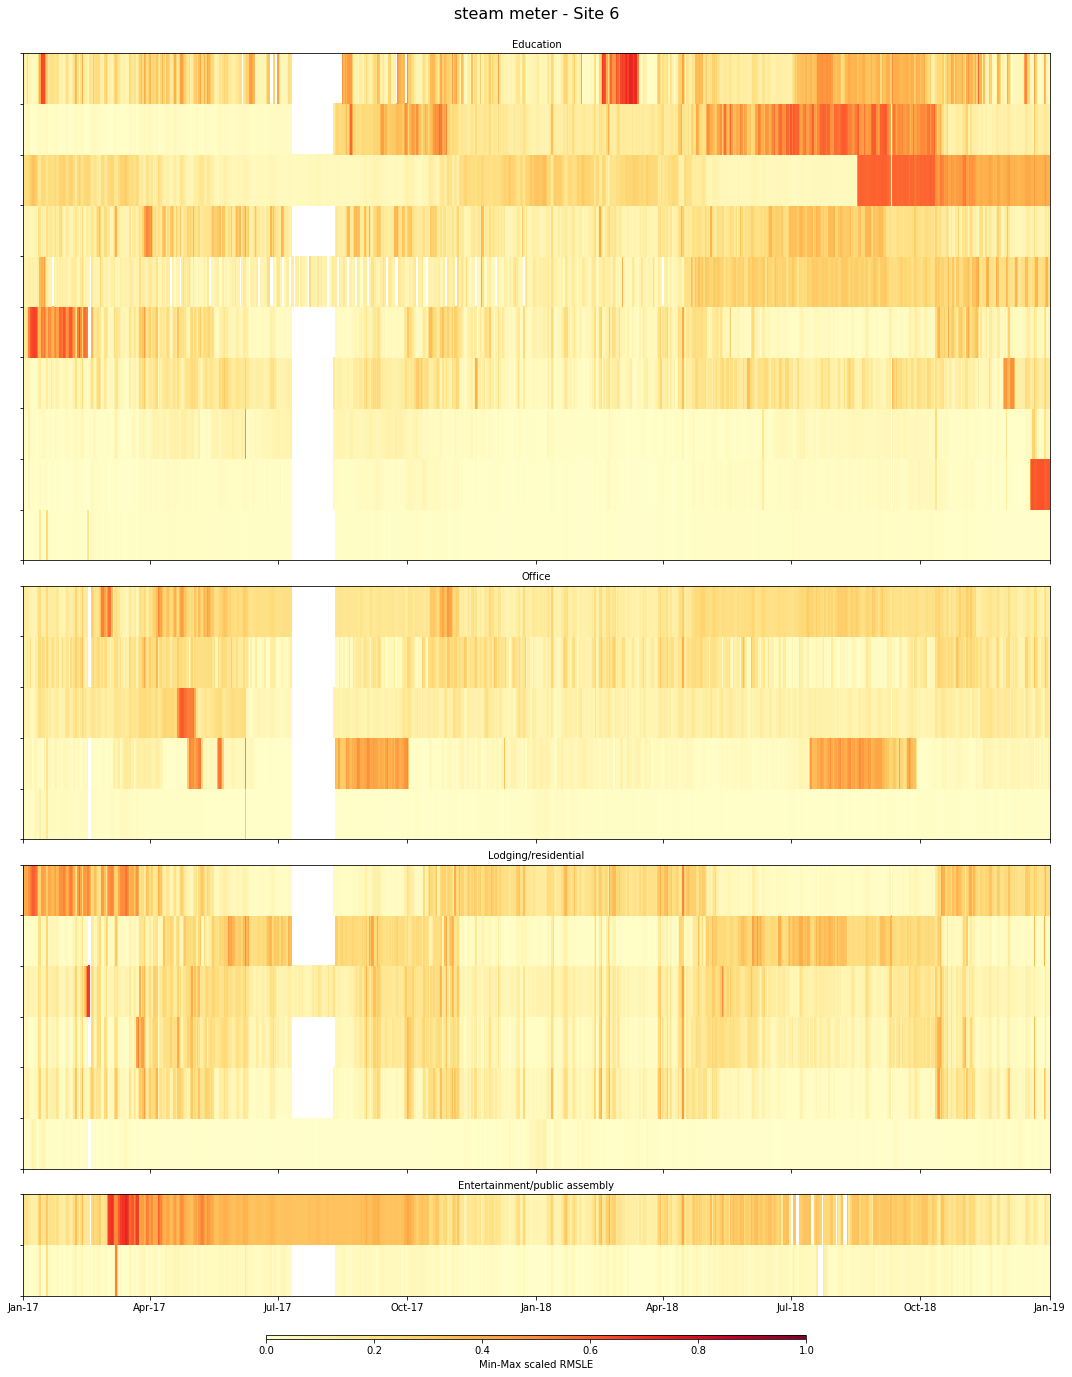

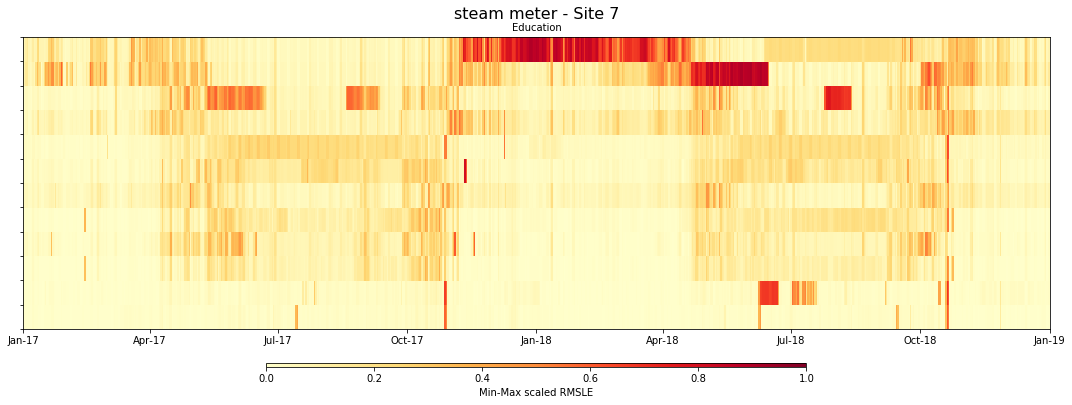

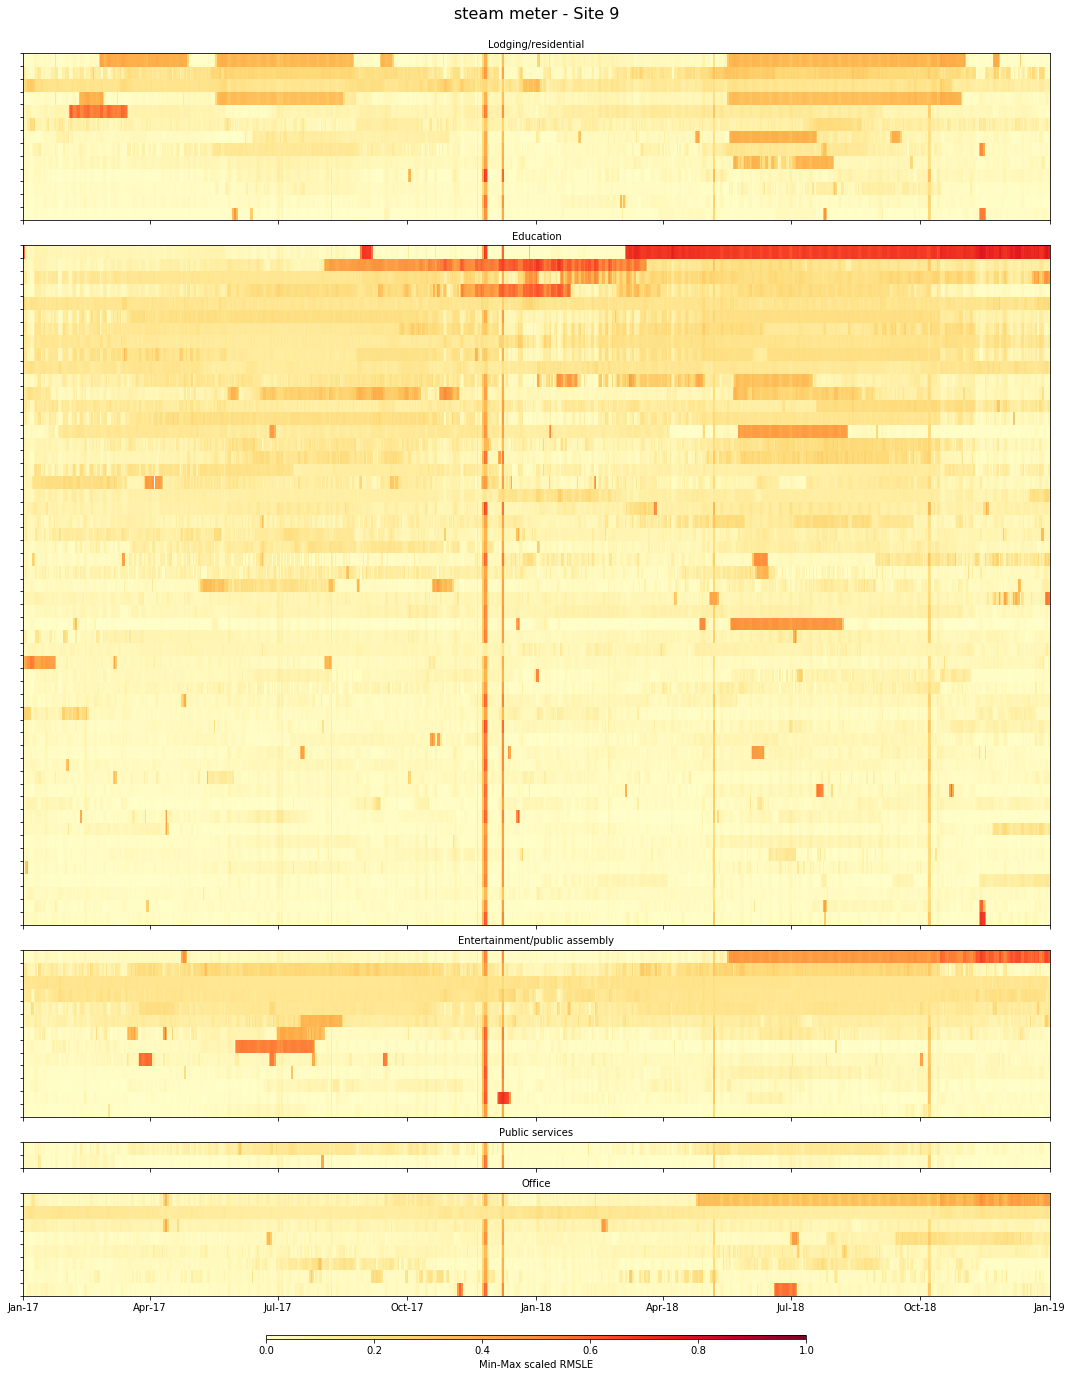

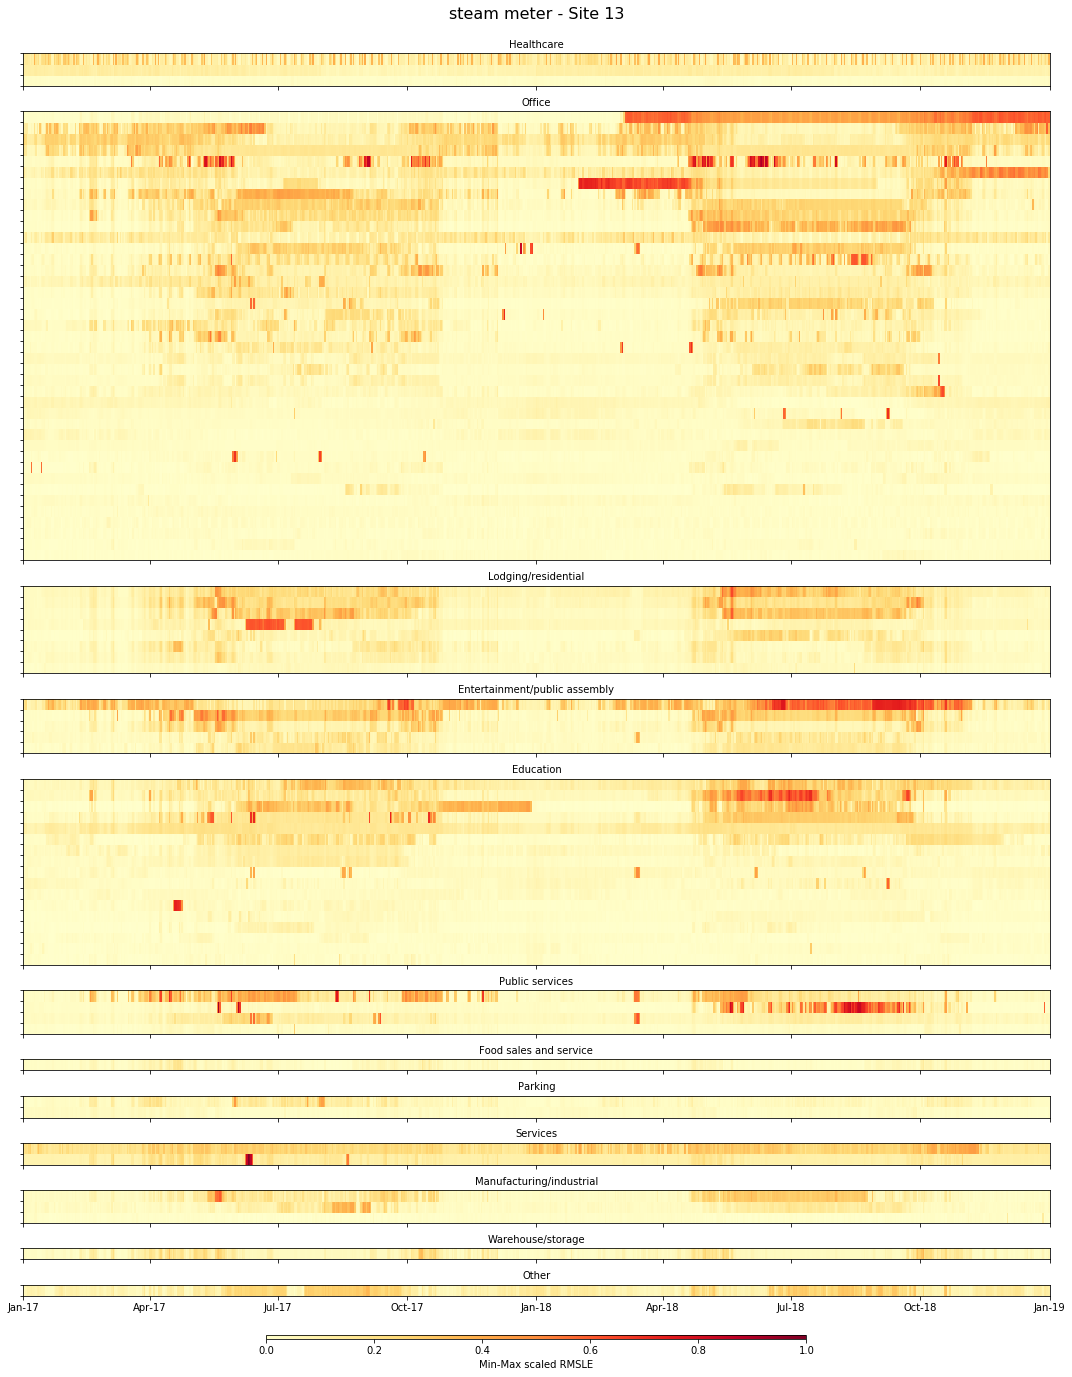

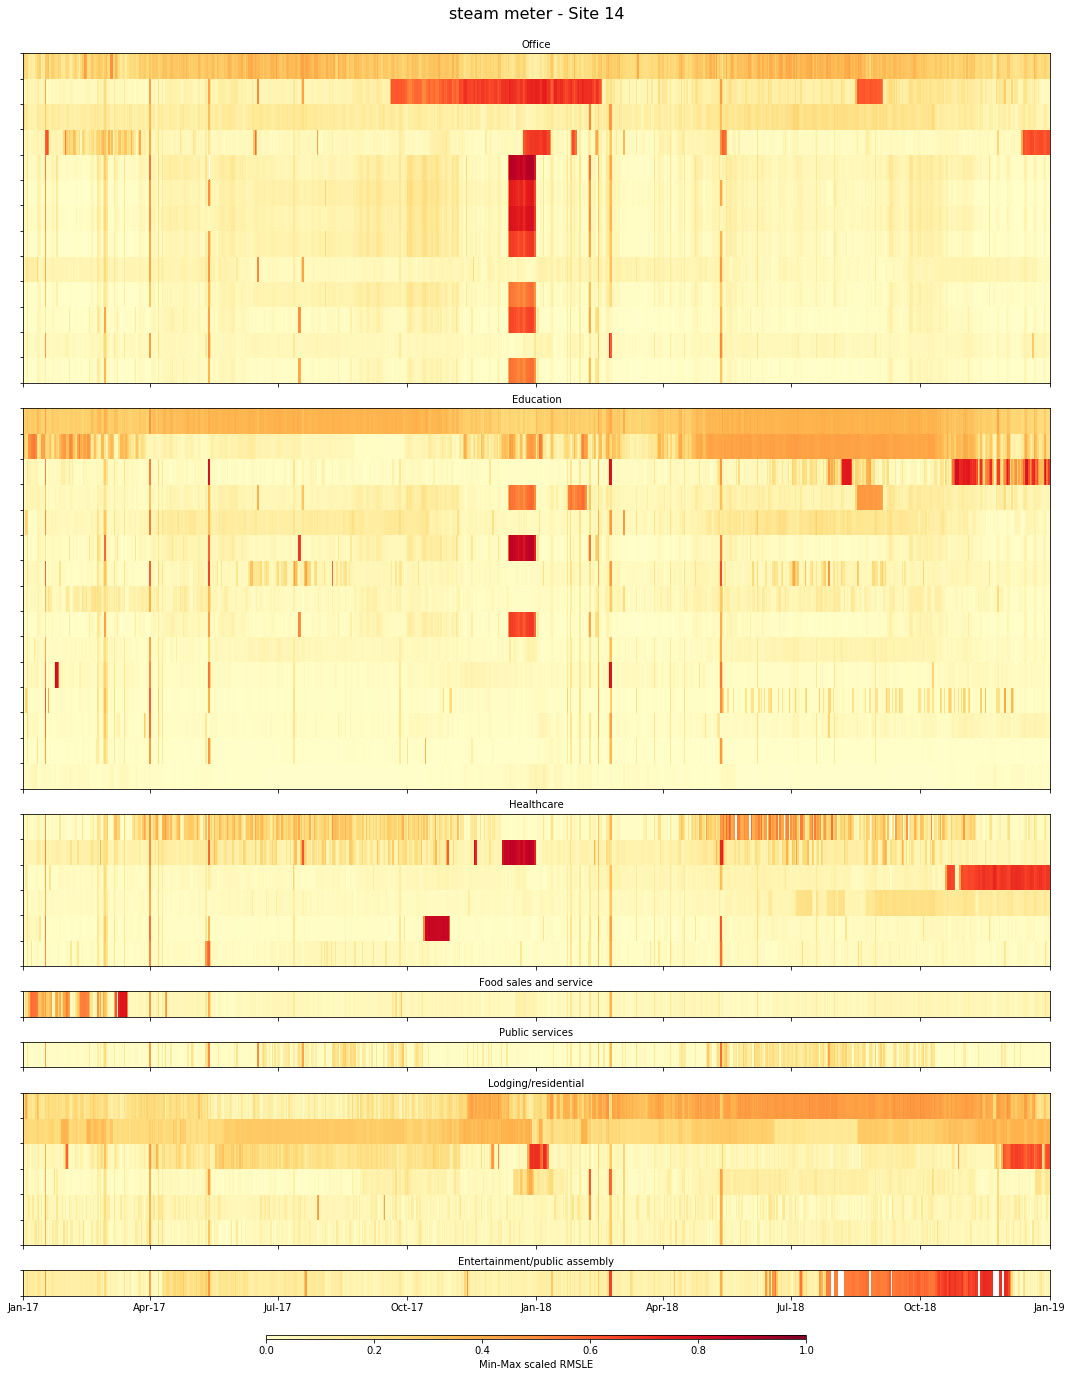

In [12]:
# Create figures
sites_list, figs = utils.plot_heatmaps_2group(meter,"site_id","primary_use",df,1)
#Save figures
for site,fig in zip(sites_list,figs):
    fig.savefig(path_fig + f"{meter}_site_{site}_primaryuse.png", bbox_inches='tight', dpi=200)